# Capstone Project- Synopsis

# Heart Failure Prediction

#### Goal: To analyze risk factors for heart failure and build a model to predict chances of heart failure in an individual.

Heart Diseases are considered to be life-threatening and should be recognized at an early stage to make it less fatal. The most common disease is heart failure, and it is the most fatal of all and needs to be taken care of.


The proposed model would help in the prediction of failures at an early stage and stop it from being more fatal.

Attributes:

Features:

Age | Objective Feature | age | int (days)><br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

Importing Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
import scipy
from scipy.stats import stats
#from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [146]:
plt.rcParams['figure.figsize'] = [15,8]

Reading the Data

In [147]:
data_heart=pd.read_csv("cardio_train.csv",sep=';')
data_heart.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


Understanding the features

In [148]:
data_heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Dropping the insignificant features

In [150]:
data_heart=data_heart.drop('id',axis=1)

Eliminating the duplicate values

In [151]:
data_heart.duplicated().value_counts()

False    69976
True        24
Name: count, dtype: int64

In [152]:
data_heart.drop_duplicates(inplace=True)

In [153]:
data_heart.shape

(69976, 12)

Now the data set has 69976 rows and 12 features

Modifying the data and datatypes

In [154]:
data_heart.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Here age is in days. Hence converting it to years

In [155]:
data_heart.age=data_heart.age.apply(lambda x: x//365)

In [156]:
data_heart.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.000000,110,80,1,1,0,0,1,0
1,55,1,156,85.000000,140,90,3,1,0,0,1,1
2,51,1,165,64.000000,130,70,3,1,0,0,0,1
3,48,2,169,82.000000,150,100,1,1,0,0,1,1
4,47,1,156,56.000000,100,60,1,1,0,0,0,0


In [157]:
data_heart['cholesterol'].value_counts()

cholesterol
1    52361
2     9549
3     8066
Name: count, dtype: int64

Here Gender is a categorical variable as it takes 0 and 1 values only. Hence converting data type to object

In [158]:
data_heart['gender']=data_heart['gender'].astype(object)
data_heart['cholesterol']=data_heart['cholesterol'].astype(object)
data_heart['gluc']=data_heart['gluc'].astype(object)
data_heart['smoke']=data_heart['smoke'].astype(object)
data_heart['alco']=data_heart['alco'].astype(object)
data_heart['active']=data_heart['active'].astype(object)

In [159]:
data_heart.dtypes

age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

To check if null values are present in the dataset or not

In [160]:
data_heart.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

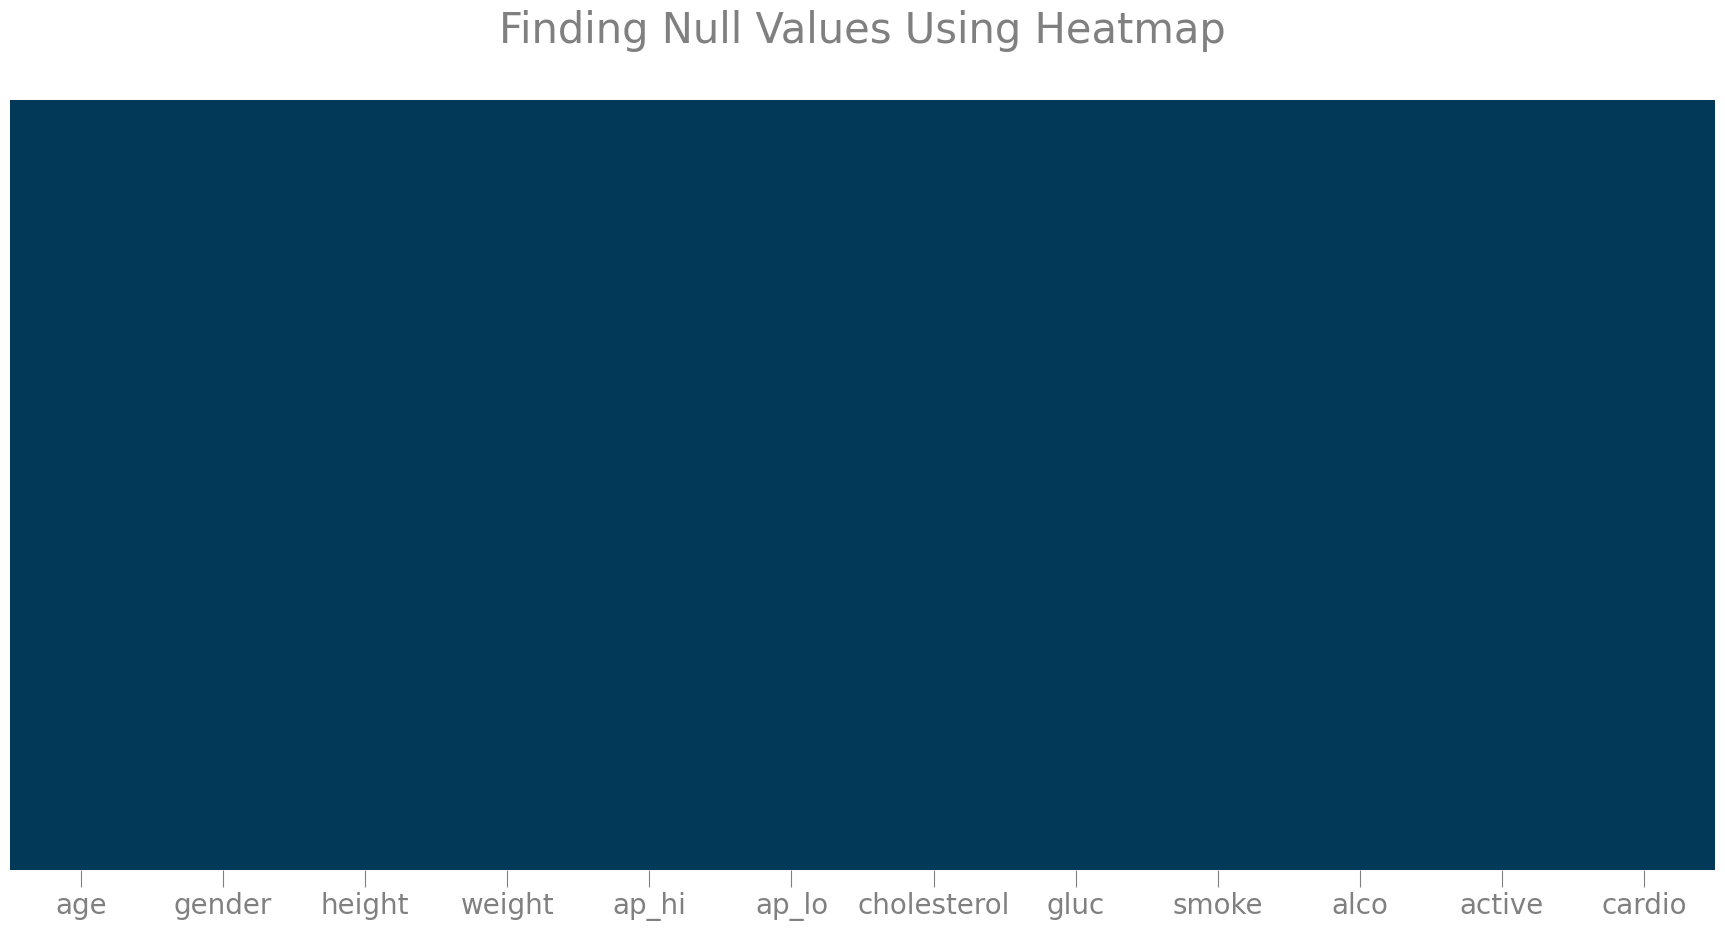

In [161]:
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(data_heart.isnull(),yticklabels=False,cbar=False,cmap='PuBu_r')

Now check for the outliers in the data

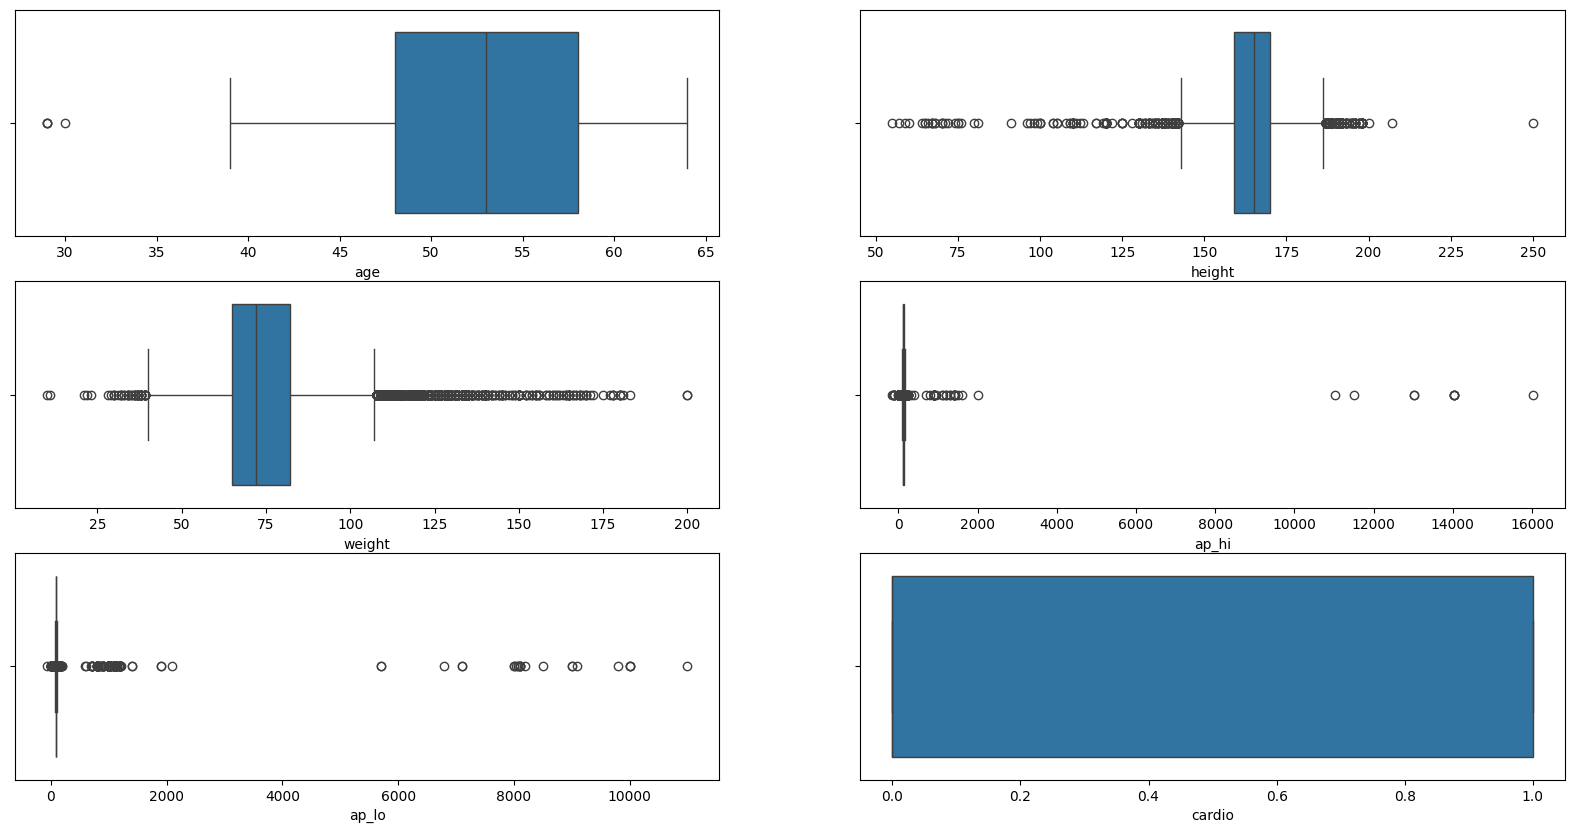

In [162]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(data_heart.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(x=var,data=data_heart,ax=subplot)
plt.show()

Outlier treatment

Here on analysing the data for each feature and considering the optimal range, outliers are treated.

In [163]:
data_heart.drop(data_heart[(data_heart['height'] > data_heart['height'].quantile(0.975)) | (data_heart['height'] < data_heart['height'].quantile(0.025))].index,inplace=True)
data_heart.drop(data_heart[(data_heart['weight'] > data_heart['weight'].quantile(0.975)) | (data_heart['weight'] < data_heart['weight'].quantile(0.025))].index,inplace=True)

In [164]:
data_heart.drop(data_heart[(data_heart['ap_hi'] > data_heart['ap_hi'].quantile(0.975)) | (data_heart['ap_hi'] < data_heart['ap_hi'].quantile(0.025))].index,inplace=True)
data_heart.drop(data_heart[(data_heart['ap_lo'] > data_heart['ap_lo'].quantile(0.975)) | (data_heart['ap_lo'] < data_heart['ap_lo'].quantile(0.025))].index,inplace=True)

In [165]:
data_heart=data_heart.reset_index(drop=True)

In [166]:
data_heart.shape

(60118, 12)

Outliers check after removing outlier in the data

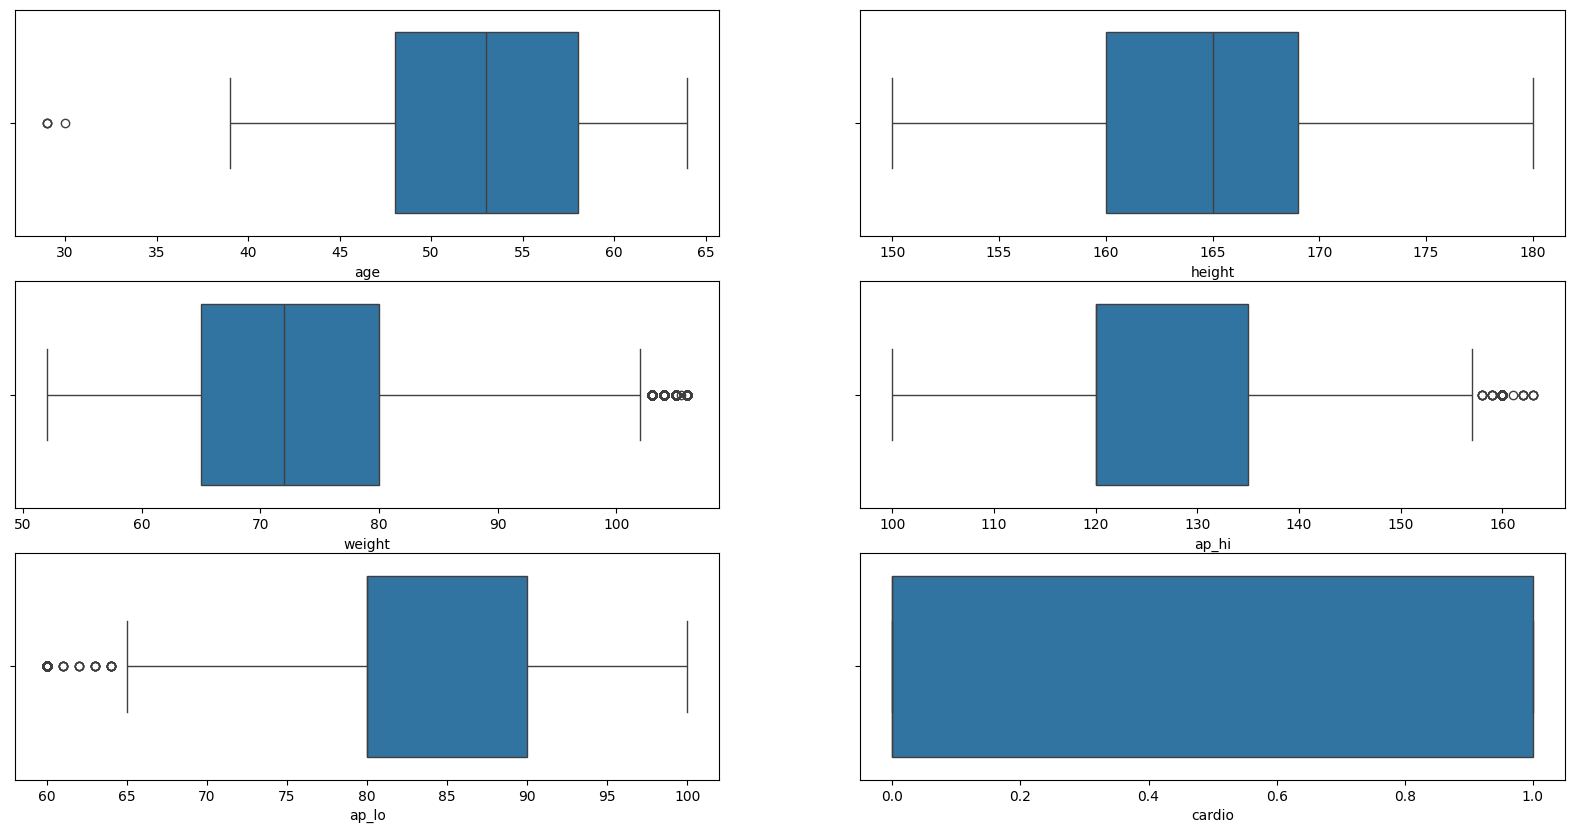

In [167]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(data_heart.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(x=var,data=data_heart,ax=subplot)

plt.show()

Applying Feature Engineering

In [168]:
data_heart['BMI'] = data_heart['weight']/((data_heart['height']/100)**2)

In [169]:
data_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.000000,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.000000,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.000000,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.000000,100,60,1,1,0,0,0,0,23.011177


In [170]:
data_heart['MAP'] = ((2* data_heart['ap_lo']) + (data_heart['ap_hi']))/3

In [171]:
data_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,2,168,62.000000,110,80,1,1,0,0,1,0,21.967120,90.000000
1,55,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679,106.666667
2,51,1,165,64.000000,130,70,3,1,0,0,0,1,23.507805,90.000000
3,48,2,169,82.000000,150,100,1,1,0,0,1,1,28.710479,116.666667
4,47,1,156,56.000000,100,60,1,1,0,0,0,0,23.011177,73.333333


In [172]:
data_heart.drop('weight', axis = 1,inplace=True)
data_heart.drop('height', axis = 1,inplace=True)
data_heart.drop('ap_hi', axis = 1,inplace=True)
data_heart.drop('ap_lo', axis = 1,inplace=True)

In [173]:
data_features = data_heart.drop('cardio', axis = 1)
data_target = pd.DataFrame(data_heart['cardio'],columns = ['cardio'])

In [174]:
data_features.shape

(60118, 9)

In [175]:
data_target.shape

(60118, 1)

-- Now dividing the data into numerical and categorical one

In [176]:
data_numeric_features=data_features.select_dtypes(include=np.number)
data_categorical_features = data_features.select_dtypes(include=object)
data_numeric_features.head()

,age,BMI,MAP
0,50,21.967120,90.000000
1,55,34.927679,106.666667
2,51,23.507805,90.000000
3,48,28.710479,116.666667
4,47,23.011177,73.333333


In [177]:
data_categorical_features.head()

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0


Relationship between the variables

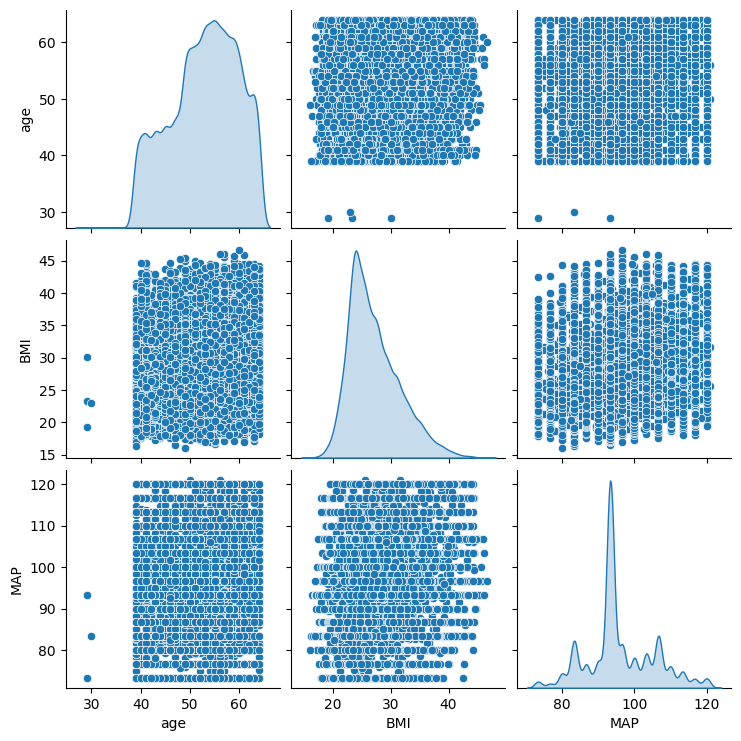

In [178]:
sns.pairplot(data_numeric_features,diag_kind='kde')

There is no significant relationship/pattern in the distribution of variables

<Axes: >

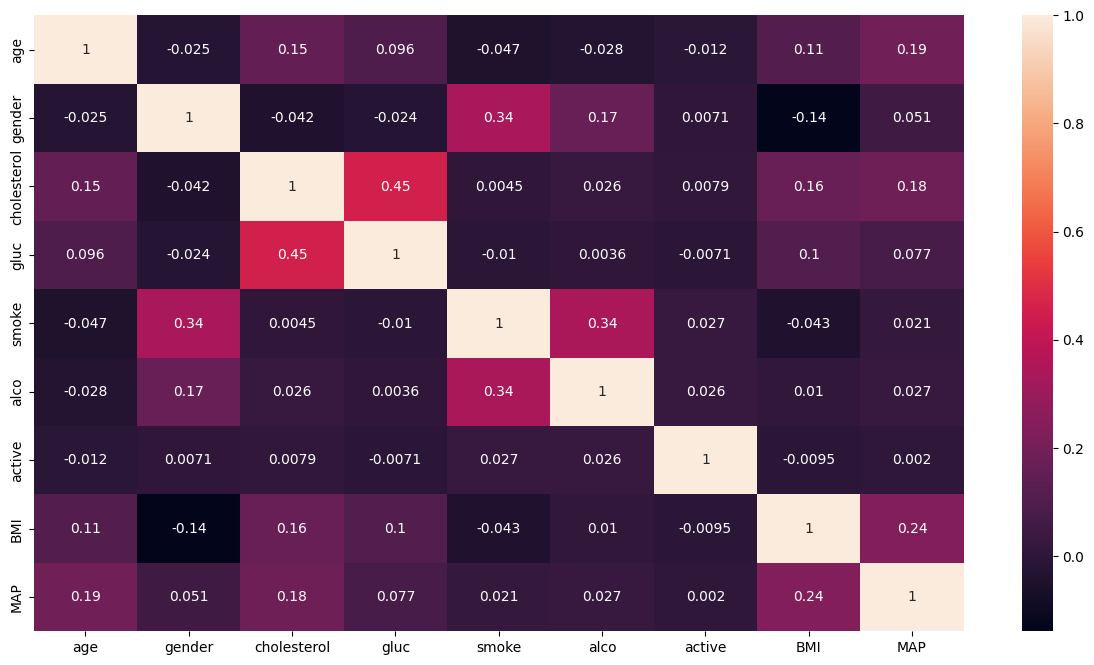

In [179]:
sns.heatmap(data_features.corr(), annot = True)

There is no correlation between the variables

Multicollinearity Test

In [180]:
np.linalg.det(data_features.corr())

0.5085855328060046

In [181]:
data_numeric_features.head()

,age,BMI,MAP
0,50,21.967120,90.000000
1,55,34.927679,106.666667
2,51,23.507805,90.000000
3,48,28.710479,116.666667
4,47,23.011177,73.333333


Distribution of numeric features

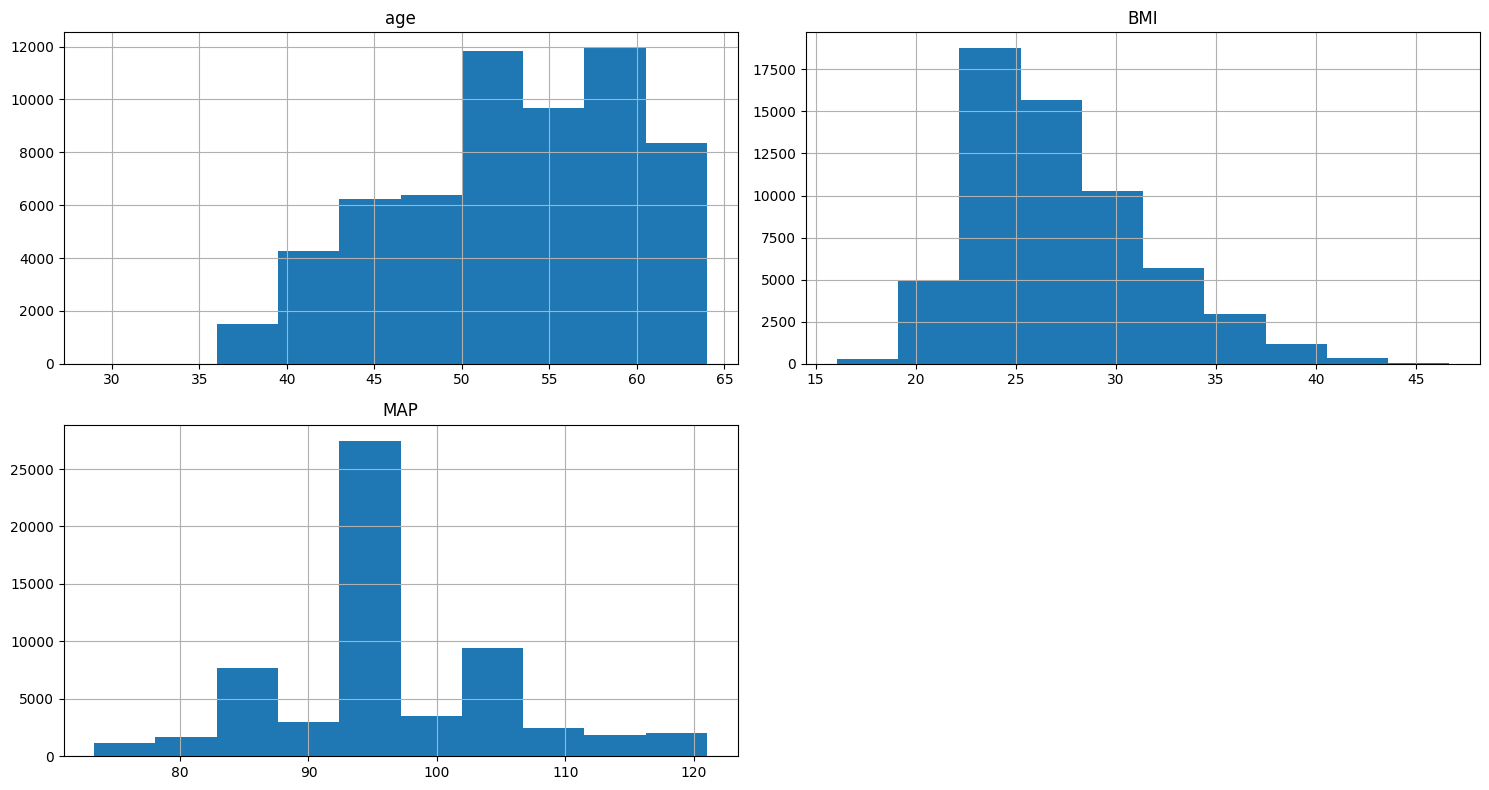

In [182]:
data_numeric_features.hist()
plt.tight_layout()
plt.show()

The Examination of Target Variable

In [183]:
data_target.cardio.value_counts()

cardio
0    30762
1    29356
Name: count, dtype: int64

The Target/Class is balanced. Hence no imbalance treatment is required

Feature Engineering

Now convert the categorical variables into dummy variables to make it into numerical columns

In [184]:
data_categorical_features.head()

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0


In [185]:
from sklearn.preprocessing import LabelEncoder
dummy_feat=data_categorical_features.apply(lambda a: LabelEncoder().fit_transform(a))

In [186]:
dummy_feat.head()

,gender,cholesterol,gluc,smoke,alco,active
0,1,0,0,0,0,1
1,0,2,0,0,0,1
2,0,2,0,0,0,0
3,1,0,0,0,0,1
4,0,0,0,0,0,0


Now check the distribution of the data

In [187]:
data_numeric_features.skew()

age   -0.305804
BMI    0.826138
MAP    0.349842
dtype: float64

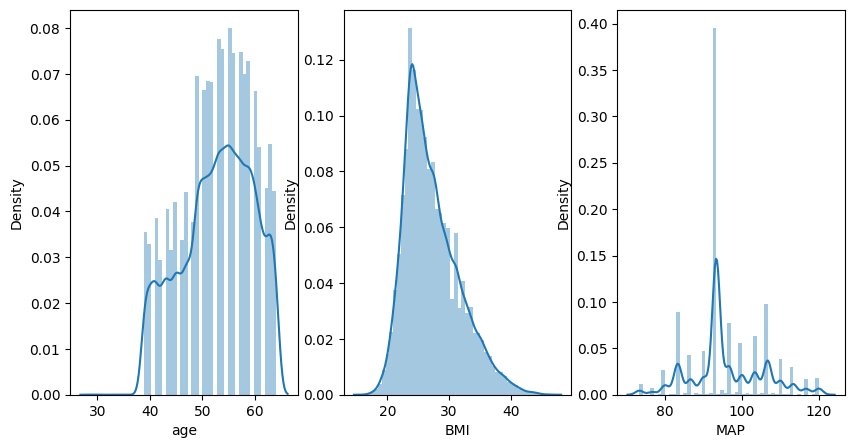

In [188]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
for var,subplot in zip(data_numeric_features.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(data_numeric_features[var],ax=subplot)
plt.show()

Transformation of data

In [189]:
from scipy.stats import yeojohnson
data_numeric_features['age']=yeojohnson(data_numeric_features.age)[0]
data_numeric_features['BMI']=yeojohnson(data_numeric_features.BMI)[0]
data_numeric_features['MAP']=yeojohnson(data_numeric_features.MAP)[0]

In [190]:
data_numeric_features.skew()

age   -0.085434
BMI    0.022478
MAP   -0.000622
dtype: float64

Scaling the data

In [191]:
data_all_variables = pd.concat([data_numeric_features,dummy_feat], axis = 1)
data_all_variables.head()

,age,BMI,MAP,gender,cholesterol,gluc,smoke,alco,active
0,1599.389293,0.834155,2.882931,1,0,0,0,0,1
1,1939.366044,0.843118,2.945307,0,2,0,0,0,1
2,1664.691257,0.835763,2.882931,0,2,0,0,0,0
3,1472.814531,0.839873,2.977345,1,0,0,0,0,1
4,1411.538498,0.835269,2.804838,0,0,0,0,0,0


In [192]:
num_scale=StandardScaler().fit_transform(data_all_variables)
data_scaled=pd.DataFrame(data=num_scale, columns =  data_all_variables.columns)
data_scaled.head()

,age,BMI,MAP,gender,cholesterol,gluc,smoke,alco,active
0,-0.483960,-1.374609,-0.611300,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
1,0.265111,1.579854,1.144510,-0.729611,2.460440,-0.388088,-0.306090,-0.233963,0.494312
2,-0.340080,-0.844506,-0.611300,-0.729611,2.460440,-0.388088,-0.306090,-0.233963,-2.023015
3,-0.762842,0.510358,2.046346,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
4,-0.897851,-1.007332,-2.809539,-0.729611,-0.523888,-0.388088,-0.306090,-0.233963,-2.023015


In [193]:
data_scaled.shape

(60118, 9)

<Axes: >

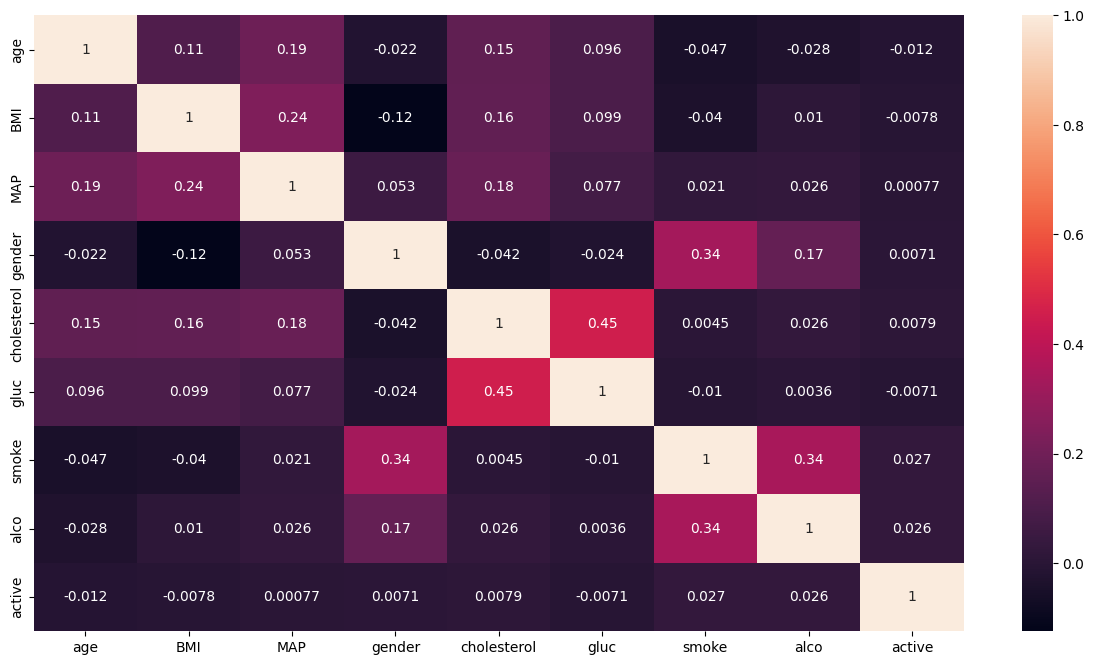

In [194]:
sns.heatmap(data_scaled.corr(),annot=True)

-- Now merging the numerical data and the categorical data

In [195]:
X=data_scaled
X.head()

,age,BMI,MAP,gender,cholesterol,gluc,smoke,alco,active
0,-0.483960,-1.374609,-0.611300,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
1,0.265111,1.579854,1.144510,-0.729611,2.460440,-0.388088,-0.306090,-0.233963,0.494312
2,-0.340080,-0.844506,-0.611300,-0.729611,2.460440,-0.388088,-0.306090,-0.233963,-2.023015
3,-0.762842,0.510358,2.046346,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
4,-0.897851,-1.007332,-2.809539,-0.729611,-0.523888,-0.388088,-0.306090,-0.233963,-2.023015


In [196]:
X.shape

(60118, 9)

In [197]:
y = data_target
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [198]:
y.shape

(60118, 1)

In [199]:
from sklearn.model_selection import train_test_split
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (42082, 10)
X_test (18036, 10)
y_train (42082, 1)
y_test (18036, 1)


In [200]:
X_train.head()

,const,age,BMI,MAP,gender,cholesterol,gluc,smoke,alco,active
23745,1.000000,1.088605,0.515464,0.821007,1.370593,-0.523888,-0.388088,3.267017,-0.233963,0.494312
59390,1.000000,-1.872067,-0.900193,-0.230341,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
38446,1.000000,1.088605,0.365794,1.456058,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
23008,1.000000,-0.624879,-0.200712,-0.230341,1.370593,-0.523888,-0.388088,-0.306090,-0.233963,0.494312
32351,1.000000,0.423843,-0.688356,0.276348,1.370593,0.968276,-0.388088,-0.306090,-0.233963,0.494312


Statistical significance of variables

In [201]:
sigdata=pd.concat([data_categorical_features,data_numeric_features,y],axis=1)
sigdata.head()

,gender,cholesterol,gluc,smoke,alco,active,age,BMI,MAP,cardio
0,2,1,1,0,0,1,1599.389293,0.834155,2.882931,0
1,1,3,1,0,0,1,1939.366044,0.843118,2.945307,1
2,1,3,1,0,0,0,1664.691257,0.835763,2.882931,1
3,2,1,1,0,0,1,1472.814531,0.839873,2.977345,1
4,1,1,1,0,0,0,1411.538498,0.835269,2.804838,0


Age vs Cardio

In [202]:
#Ho:age of cardio effected people = age of cardio not effected people(Age not influencing)
#H1:age of cardio effected people != age of cardio not effected people(Age influencing disease)
#conisdering significant level as 0.05

In [203]:
from scipy import stats
from scipy.stats import shapiro
Cardio_yes=sigdata[sigdata["cardio"]==1]["age"]
Cardio_no=sigdata[sigdata["cardio"]==0]['age']

In [204]:
shapiro(Cardio_yes)

ShapiroResult(statistic=0.9693225026130676, pvalue=0.0)

In [205]:
shapiro(Cardio_no)

ShapiroResult(statistic=0.9717668890953064, pvalue=0.0)

In [206]:
stat,pvalue=stats.ttest_ind(Cardio_yes,Cardio_no)
pvalue

0.0

In [207]:
pvalue<0.05

True

Accept H1: that means age is influencing the Cardio

<Axes: xlabel='cardio', ylabel='age'>

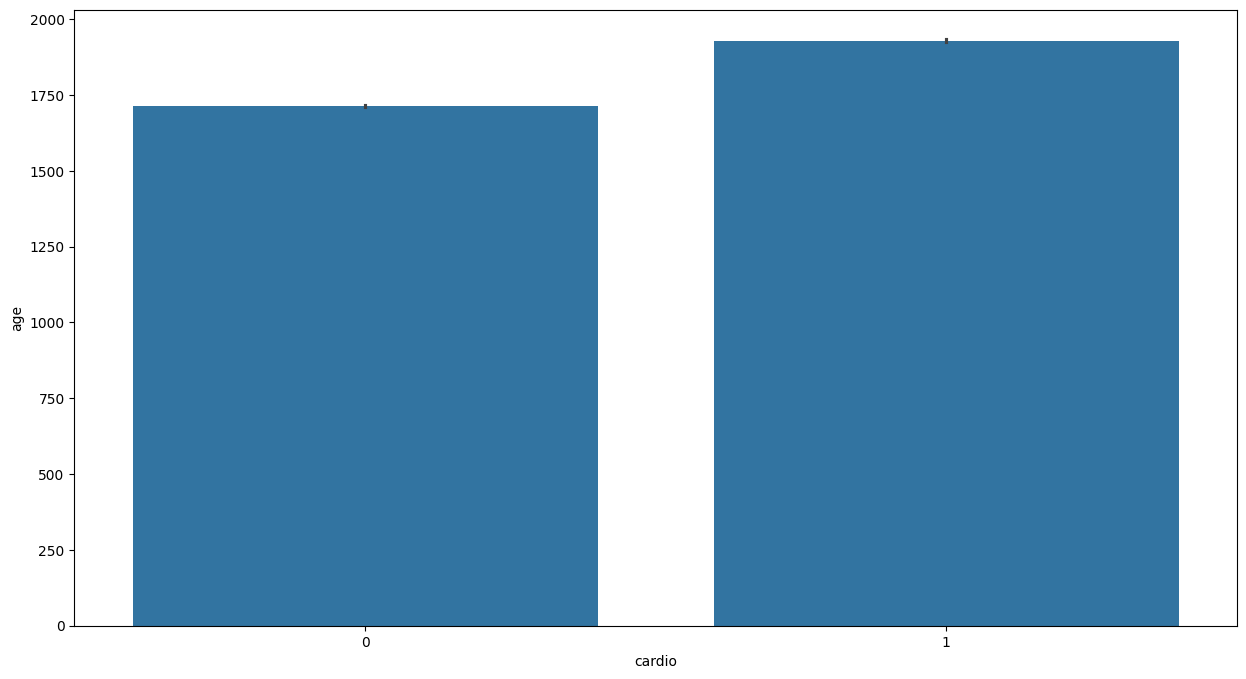

In [208]:
sns.barplot(x="cardio",y="age",data=sigdata)

BMI Vs Cardio

In [209]:
#Ho:BMI of cardio effected people = BMI of cardio not effected people(BMI not influencing)
#H1:BMI of cardio effected people != BMI of cardio not effected people(BMI influencing disease)
#conisdering significant level as 0.05

In [210]:
Cardioyes=sigdata[sigdata["cardio"]==1]["BMI"]
Cardiono=sigdata[sigdata["cardio"]==0]['BMI']


In [211]:
shapiro(Cardioyes)

ShapiroResult(statistic=0.993730366230011, pvalue=5.103470070206395e-33)

In [212]:
shapiro(Cardiono)

ShapiroResult(statistic=0.9958633780479431, pvalue=6.937555956722535e-28)

In [213]:
stat,pvalue=stats.ttest_ind(Cardioyes,Cardiono)
pvalue

0.0

<Axes: xlabel='cardio', ylabel='BMI'>

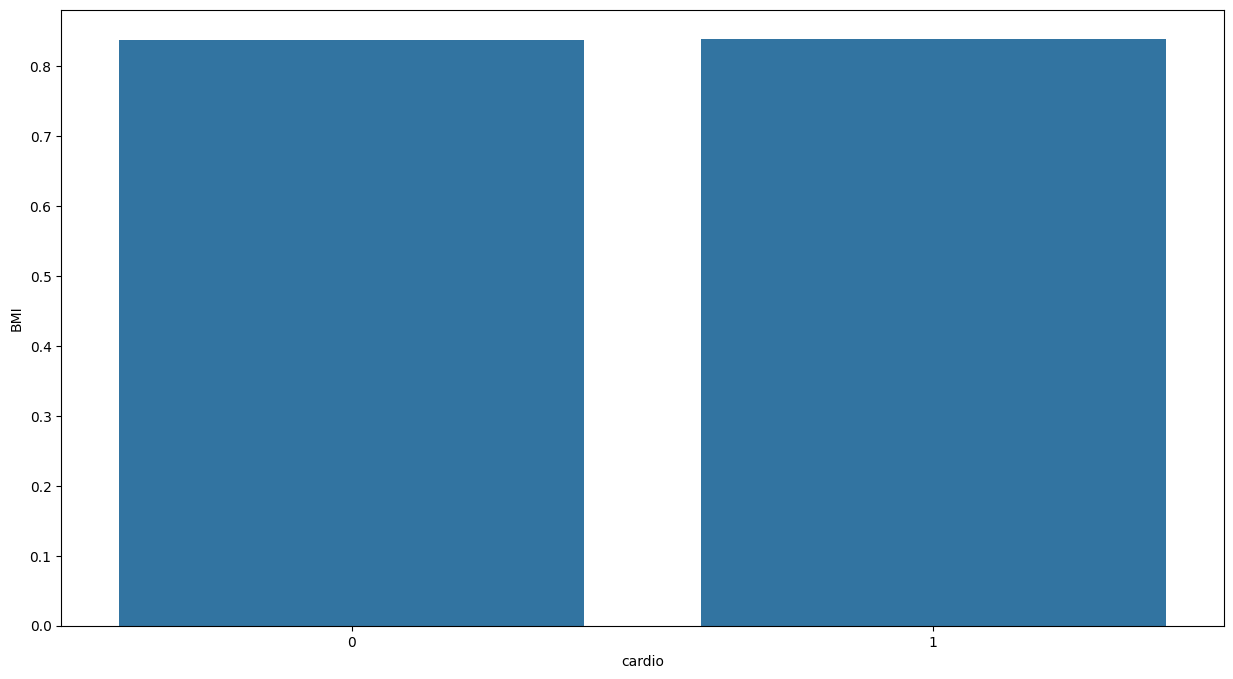

In [214]:
sns.barplot(x="cardio",y="BMI",data=sigdata)

pvalue<0.05 H1: BMI influencing Cardio

Map Vs Cardio

In [215]:
#Ho:Map of cardio effected people = Map of cardio not effected people(BMI not influencing)
#H1:Map of cardio effected people != Map of cardio not effected people(BMI influencing disease)
#conisdering significant level as 0.05

In [216]:
Cardioyes=sigdata[sigdata["cardio"]==1]["MAP"]
Cardiono=sigdata[sigdata["cardio"]==0]['MAP']

In [217]:
shapiro(Cardioyes)

ShapiroResult(statistic=0.9599993228912354, pvalue=0.0)

In [218]:
shapiro(Cardiono)

ShapiroResult(statistic=0.9107943773269653, pvalue=0.0)

In [219]:
stat,pvalue=stats.ttest_ind(Cardioyes,Cardiono)
pvalue

0.0

<Axes: xlabel='cardio', ylabel='MAP'>

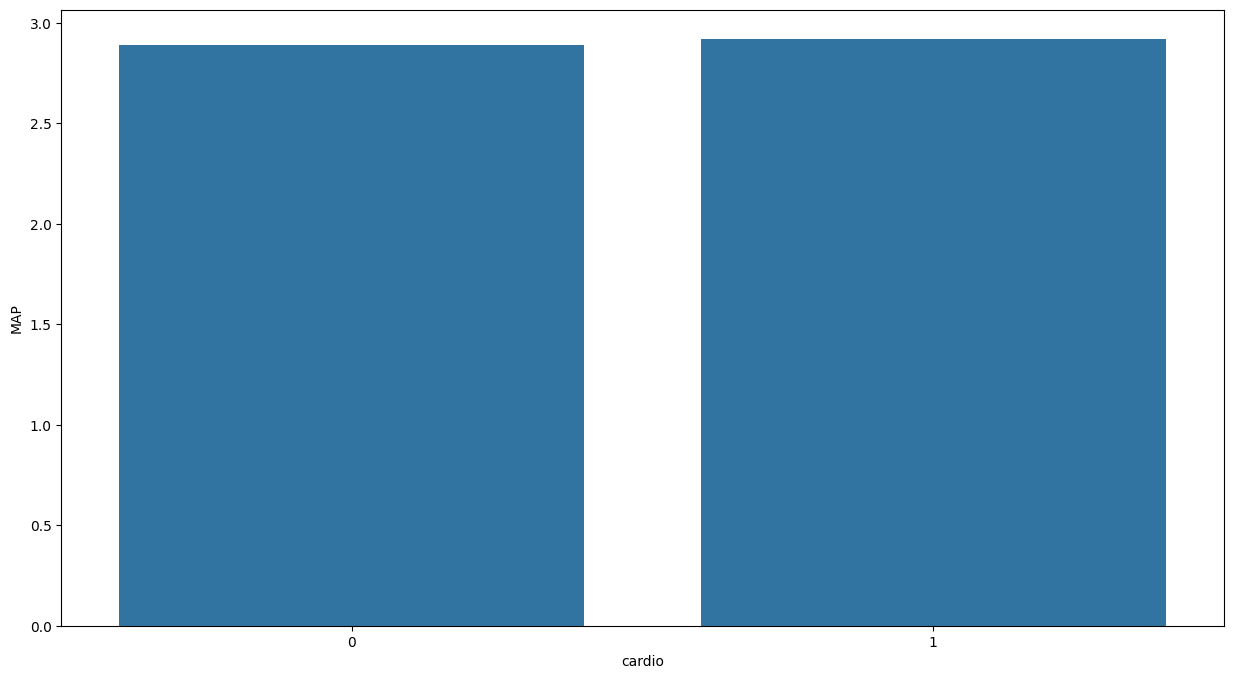

In [220]:
sns.barplot(x="cardio",y="MAP",data=sigdata)

pvalue<0.05 Map is influencing Cardio

Gender Vs Cardio

In [221]:
#HO: Gender is independent on Cardio
#H1 : Gender is dependent on Cardio

In [222]:
cr=pd.crosstab(index=sigdata['gender'],columns=sigdata["cardio"])
cr

cardio,0,1
gender,,
1,20005,19228
2,10757,10128


In [223]:
from scipy.stats import chi2_contingency
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=1.4297156890002272, pvalue=0.2318108437863363, dof=1, expected_freq=array([[20075.27772048, 19157.72227952],
       [10686.72227952, 10198.27772048]]))

pvalue =0.23 which is greater than siglevel 0.05

Accept H0 that is Gender is independent on Cardio

<Axes: xlabel='gender', ylabel='BMI'>

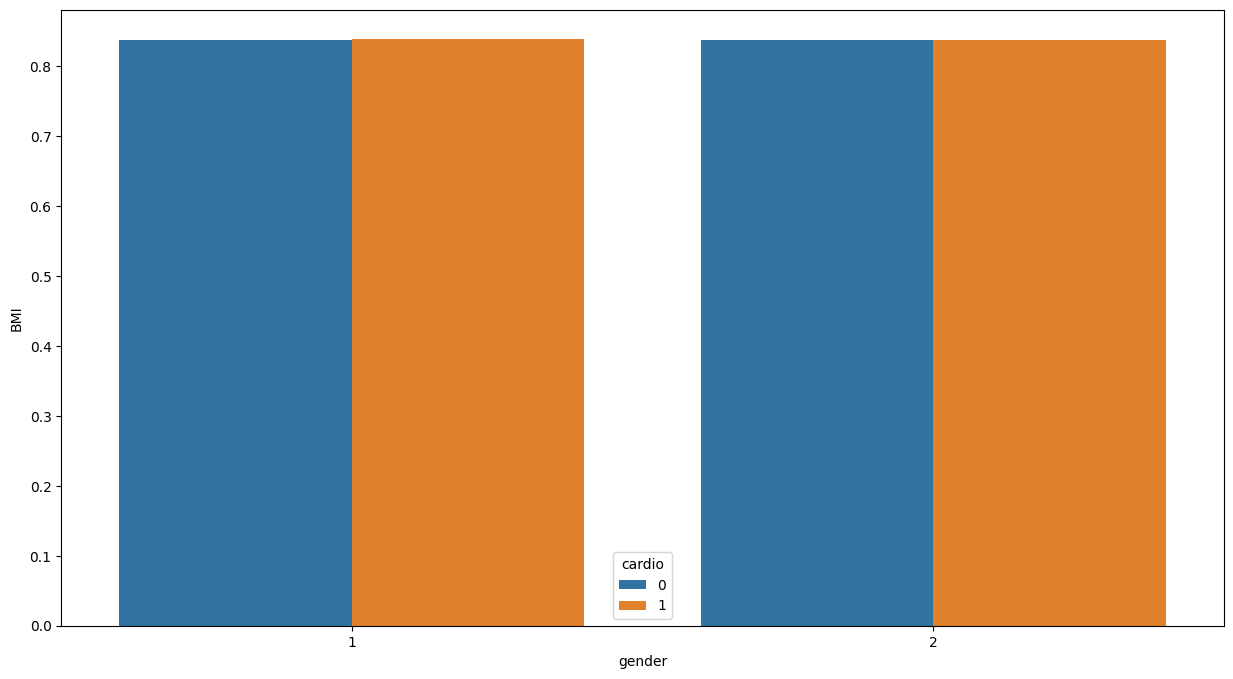

In [224]:
sns.barplot(x="gender",y="BMI",hue="cardio",data=sigdata)

Cholestrol vs cardio

In [225]:
#HO: Cholestrol is independent on Cardio
#H1 :Cholestrol is dependent on Cardio

In [226]:
cr=pd.crosstab(index=sigdata['cholesterol'],columns=sigdata["cardio"])
cr

cardio,0,1
cholesterol,,
1,25933,19730
2,3220,4583
3,1609,5043


In [227]:
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=2822.132694444621, pvalue=0.0, dof=2, expected_freq=array([[23365.46801291, 22297.53198709],
       [ 3992.74570012,  3810.25429988],
       [ 3403.78628697,  3248.21371303]]))

pvalue<0.05 reject Ho that means Cholestrol influencing Cardio

<Axes: xlabel='cholesterol', ylabel='BMI'>

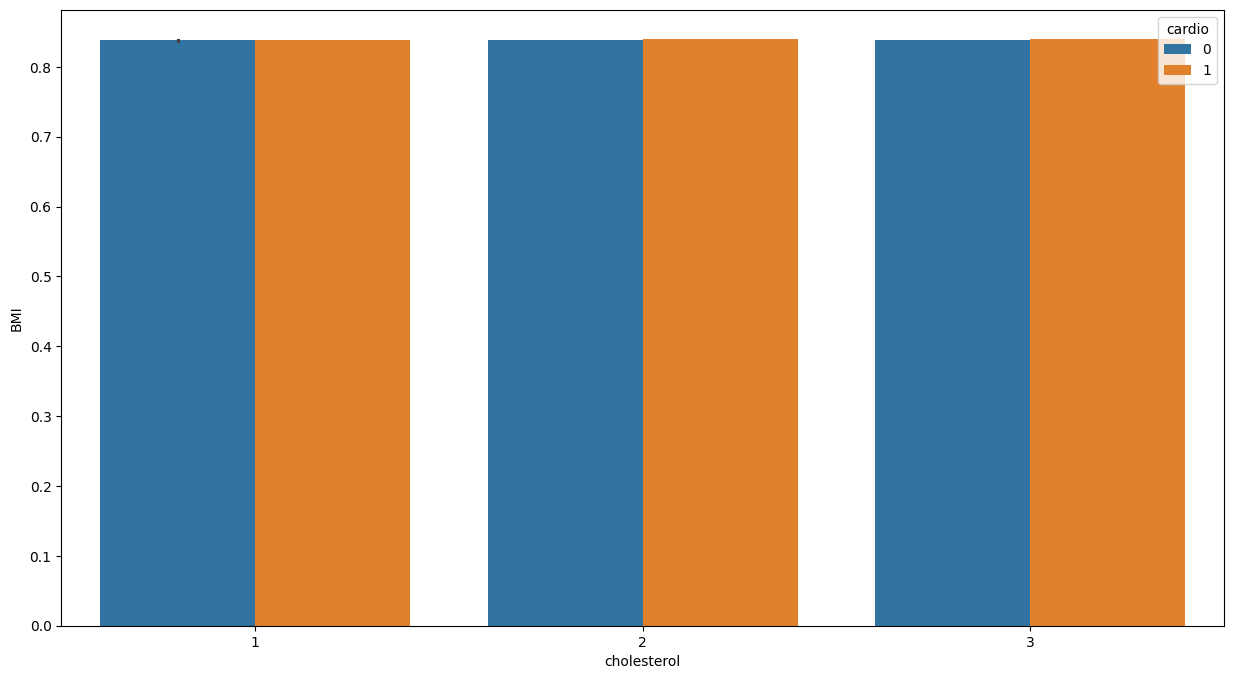

In [228]:
sns.barplot(x='cholesterol',y="BMI",hue="cardio",data=sigdata)

Glucose vs Cardio

In [229]:
#HO: Glucose is independent on Cardio
#H1 :Glucose is dependent on Cardio

In [230]:
cr=pd.crosstab(index=sigdata['gluc'],columns=sigdata["cardio"])
cr

cardio,0,1
gluc,,
1,27209,24188
2,1793,2404
3,1760,2764


In [231]:
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=456.6994795309331, pvalue=6.744784462101031e-100, dof=2, expected_freq=array([[26299.51951163, 25097.48048837],
       [ 2147.57832929,  2049.42167071],
       [ 2314.90215909,  2209.09784091]]))

pvalue<0.05 accept H1 that meanse Glucose influences Cardio

<Axes: xlabel='gluc', ylabel='BMI'>

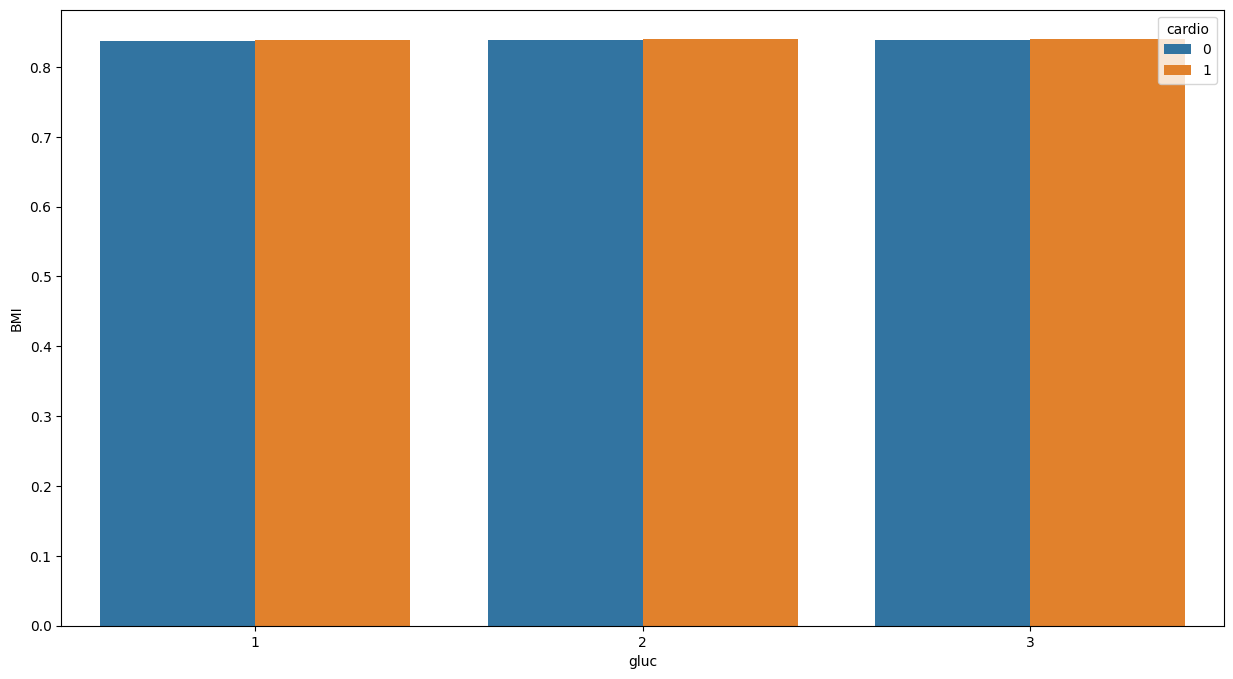

In [232]:
sns.barplot(x='gluc',y="BMI",hue="cardio",data=sigdata)

smoke vs cardio

In [233]:
#HO: SMOKE is independent on Cardio
#H1 :smoke is dependent on Cardio

In [234]:
cr=pd.crosstab(index=sigdata['smoke'],columns=sigdata["cardio"])
cr

cardio,0,1
smoke,,
0,27929,27039
1,2833,2317


In [235]:
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=33.07809805843168, pvalue=8.853036863377923e-09, dof=1, expected_freq=array([[28126.77760405, 26841.22239595],
       [ 2635.22239595,  2514.77760405]]))

pvalue<0.05 so accept H1 That means smoking has influenc on Cardio

<Axes: xlabel='smoke', ylabel='BMI'>

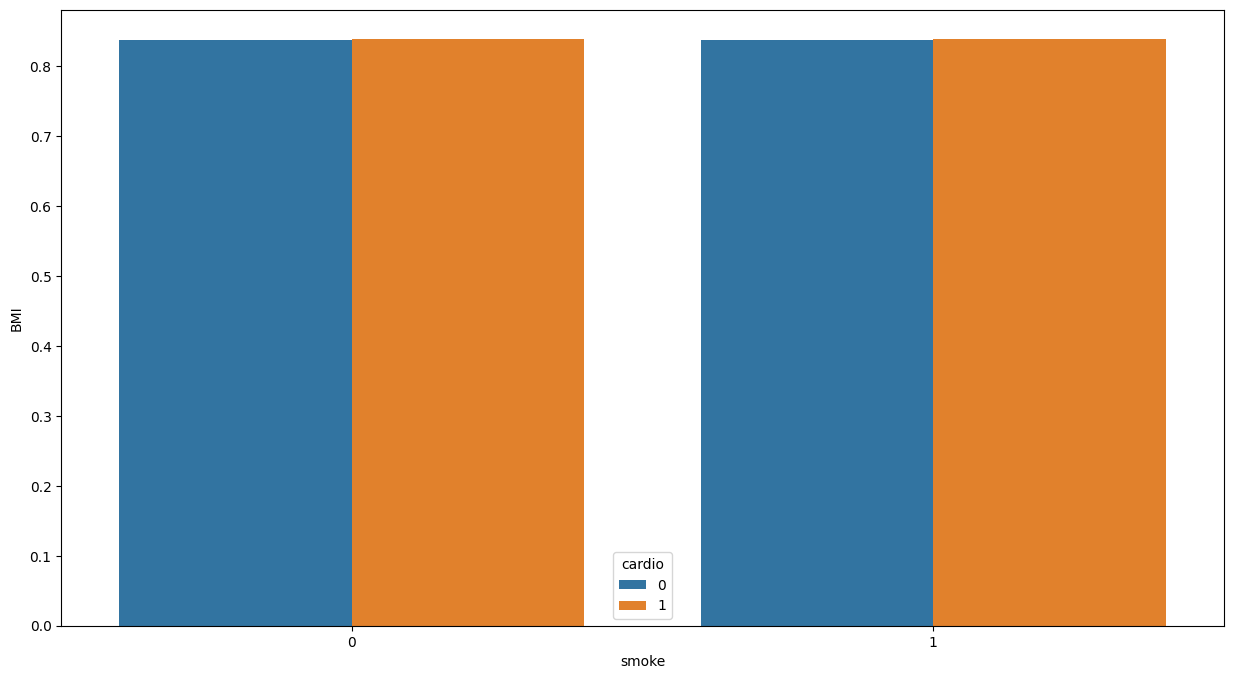

In [236]:
sns.barplot(x='smoke',y="BMI",hue="cardio",data=sigdata)

alocohol vs Cardio

In [237]:
#HO: alchol is independent on Cardio
#H1 :alchol is dependent on Cardio

In [238]:
cr=pd.crosstab(index=sigdata['alco'],columns=sigdata["cardio"])
cr

cardio,0,1
alco,,
0,29067,27931
1,1695,1425


In [239]:
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=12.998093900758557, pvalue=0.0003118082202122656, dof=1, expected_freq=array([[29165.51575235, 27832.48424765],
       [ 1596.48424765,  1523.51575235]]))

pvalue<0.05 accept H0 alcohol influences Cardio

<Axes: xlabel='alco', ylabel='BMI'>

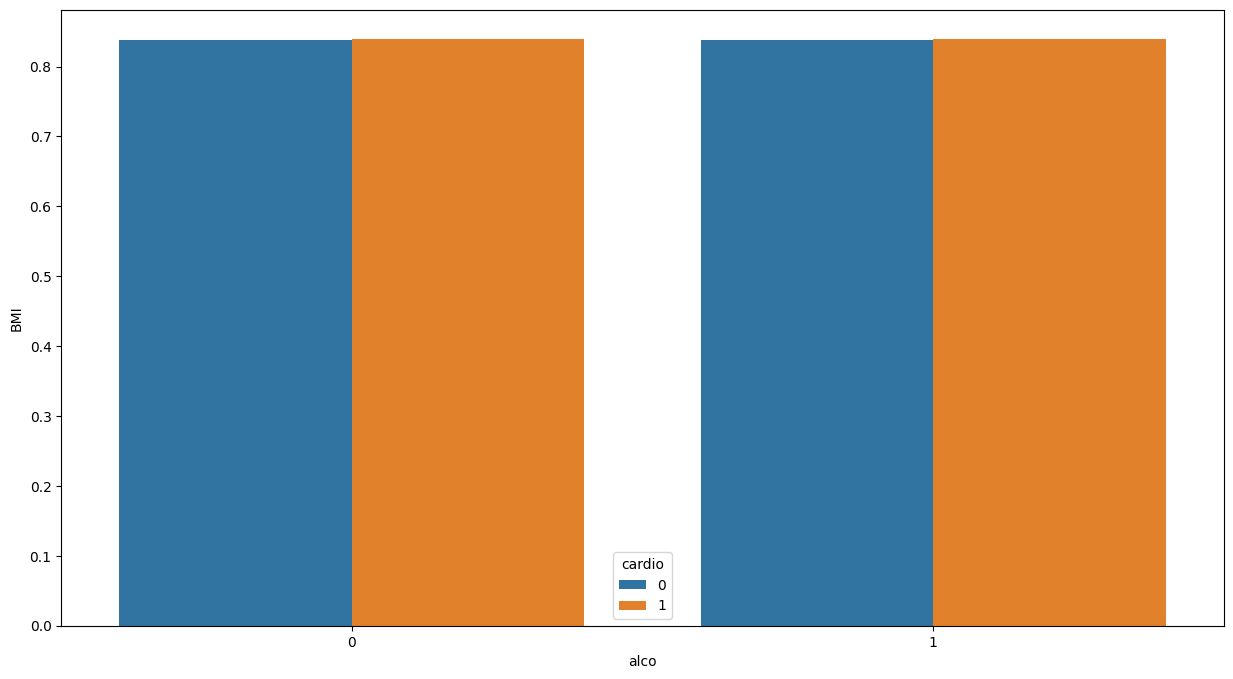

In [240]:
sns.barplot(x='alco',y="BMI",hue="cardio",data=sigdata)

active vs Cardio

In [241]:
#HO: active is independent on Cardio
#H1 :active is dependent on Cardio

In [242]:
cr=pd.crosstab(index=sigdata['active'],columns=sigdata["cardio"])
cr

cardio,0,1
active,,
0,5580,6225
1,25182,23131


In [243]:
stats.chi2_contingency(cr)

Chi2ContingencyResult(statistic=89.28333913653596, pvalue=3.4212837061210535e-21, dof=1, expected_freq=array([[ 6040.54376393,  5764.45623607],
       [24721.45623607, 23591.54376393]]))

pvalue<0.05 accept H1 active influencing Cardio

<Axes: xlabel='active', ylabel='BMI'>

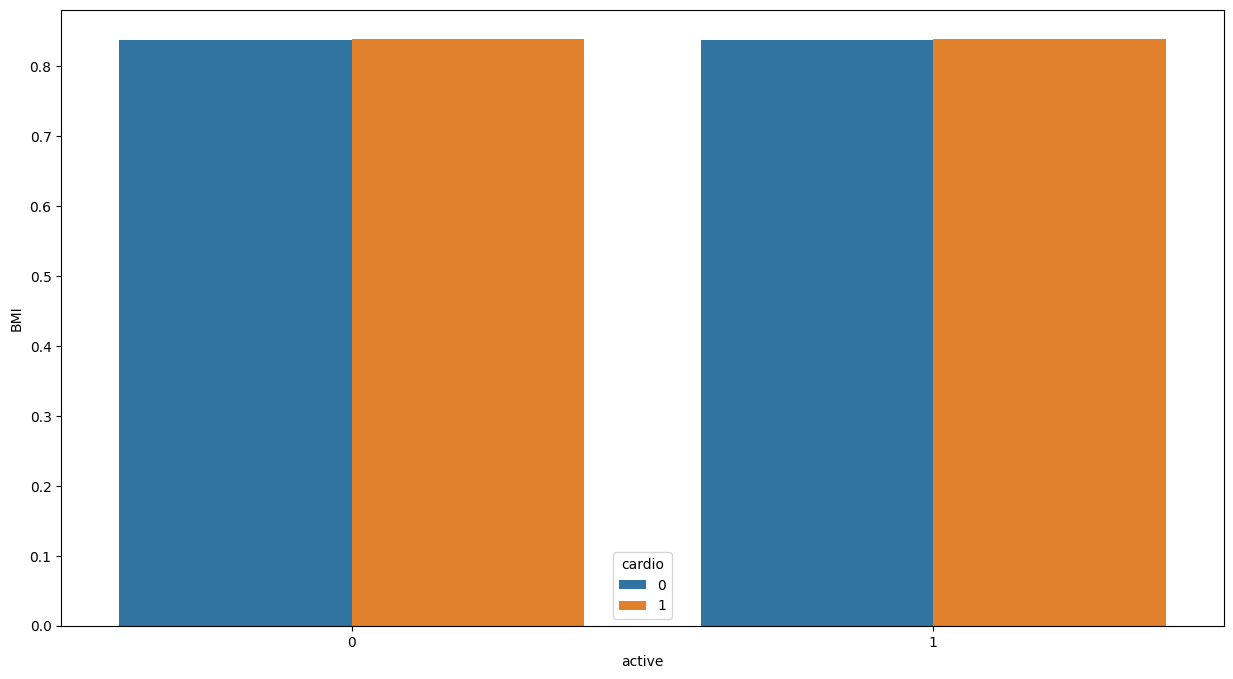

In [244]:
sns.barplot(x='active',y="BMI",hue="cardio",data=sigdata)

Base Model

In [245]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.574754
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                42082
Model:                          Logit   Df Residuals:                    42072
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.1706
Time:                        14:56:43   Log-Likelihood:                -24187.
converged:                       True   LL-Null:                       -29161.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0393      0.011     -3.564      0.000      -0.061      -0.018
age             0.3663    

<Axes: >

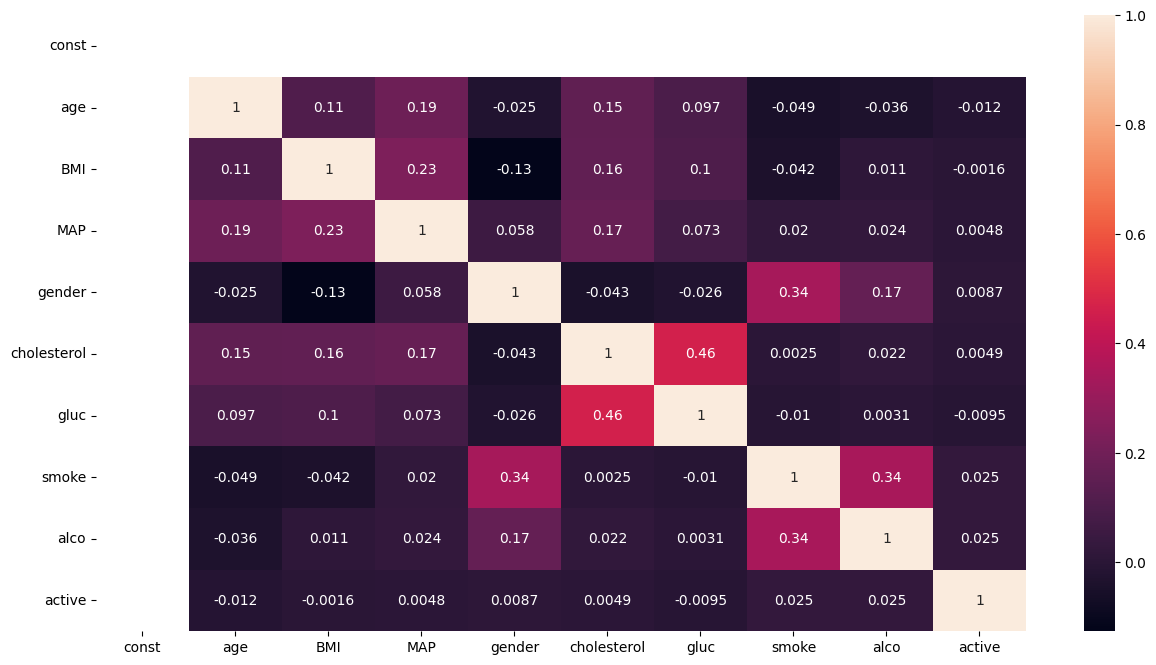

In [246]:
sns.heatmap(X_train.corr(),annot=True)

In [247]:
X_train.columns

Index(['const', 'age', 'BMI', 'MAP', 'gender', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active'],
      dtype='object')

Based on the above model we can conclude that the significant variables in the dataset based on the p-values <0.05 are:<br>
age<br>
BMI<br>
MAP<br>
cholesterol<br>
gluc<br>
smoke<br>
alco<br>
active<br>

In [248]:
score_card = pd.DataFrame(columns=['Model_Name', 'Train_accuracy','Test_accuracy'])


In [249]:
#neural network


In [250]:
y_pred_prob_train = logreg.predict(X_train)
y_pred_prob_test = logreg.predict(X_test)
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                42082
Model:                          Logit   Df Residuals:                    42072
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.1706
Time:                        14:56:43   Log-Likelihood:                -24187.
converged:                       True   LL-Null:                       -29161.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0393      0.011     -3.564      0.000      -0.061      -0.018
age             0.3663      0.011     32.075      0.000       0.344       0.389
BMI             0.1406      0.012     12.154    

In [251]:
y_pred_train=[ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
y_pred_test = [ 0 if x < 0.5 else 1 for x in y_pred_prob_test]

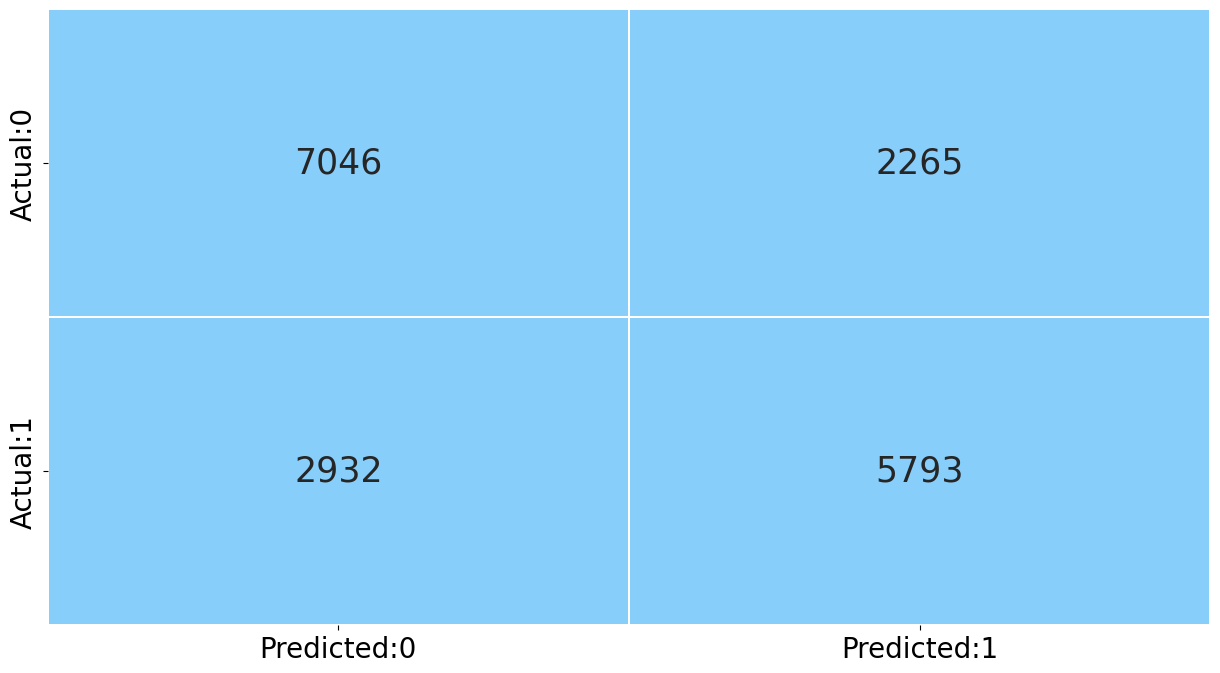

In [252]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [253]:
from sklearn.metrics import classification_report

In [254]:
acc_table = classification_report(y_train, y_pred_train)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     21451
           1       0.73      0.67      0.70     20631

    accuracy                           0.72     42082
   macro avg       0.72      0.72      0.72     42082
weighted avg       0.72      0.72      0.72     42082



In [255]:
acc_table = classification_report(y_test, y_pred_test)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      9311
           1       0.72      0.66      0.69      8725

    accuracy                           0.71     18036
   macro avg       0.71      0.71      0.71     18036
weighted avg       0.71      0.71      0.71     18036



The model is 72 % accurate

Improving the model

In [256]:
#Using correct thershold

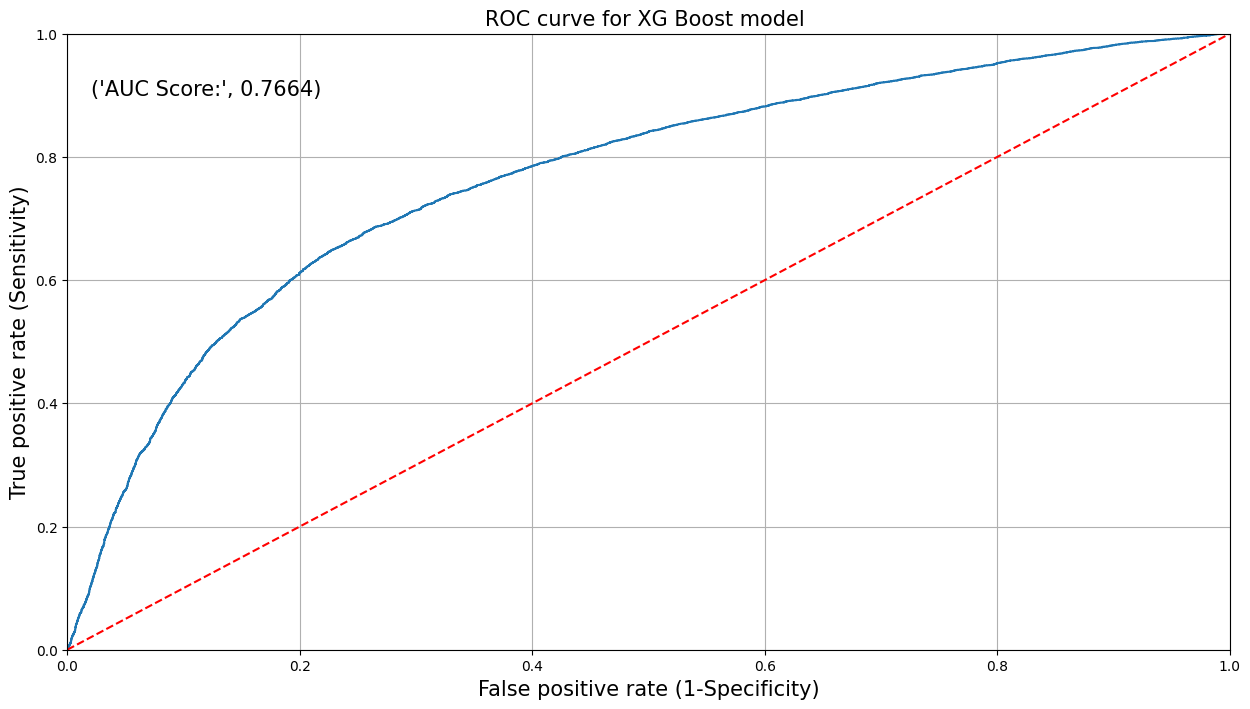

In [257]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for XG Boost model ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob_test),4)),fontsize=15)

# plot the grid
plt.grid(True)

In [258]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.678281,0.256363,0.489951,0.421917
1,0.677249,0.255397,0.490676,0.421852
2,0.676791,0.254967,0.490845,0.421824
3,0.678395,0.256578,0.489765,0.421817
4,0.678052,0.256256,0.490032,0.421796


In [259]:
#we have already considered thershold which is 0.5

In [260]:
#RFE
#Decision tree
#Random Forest - Ensemble models
#Naive Bayes
#Hyper parameter tuning
#Boosting

Decision tree

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [262]:
DT = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_samples_leaf=1,
    min_samples_split=2
)
DT_model=DT.fit(X_train,y_train)
y_pred_train=DT_model.predict(X_train)
y_pred_test=DT_model.predict(X_test)

In [263]:
acc_table = classification_report(y_train, y_pred_train)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     21451
           1       0.74      0.60      0.66     20631

    accuracy                           0.70     42082
   macro avg       0.71      0.70      0.70     42082
weighted avg       0.71      0.70      0.70     42082



In [264]:
acc_table = classification_report(y_test, y_pred_test)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      9311
           1       0.72      0.59      0.65      8725

    accuracy                           0.69     18036
   macro avg       0.70      0.69      0.69     18036
weighted avg       0.70      0.69      0.69     18036



In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [266]:
RF=RandomForestClassifier(criterion = 'gini',
                                  n_estimators = 30,
                                  max_depth = 10,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)
RF_model=RF.fit(X_train,y_train)
y_pred_train=RF_model.predict(X_train)
y_pred=RF_model.predict(X_test)

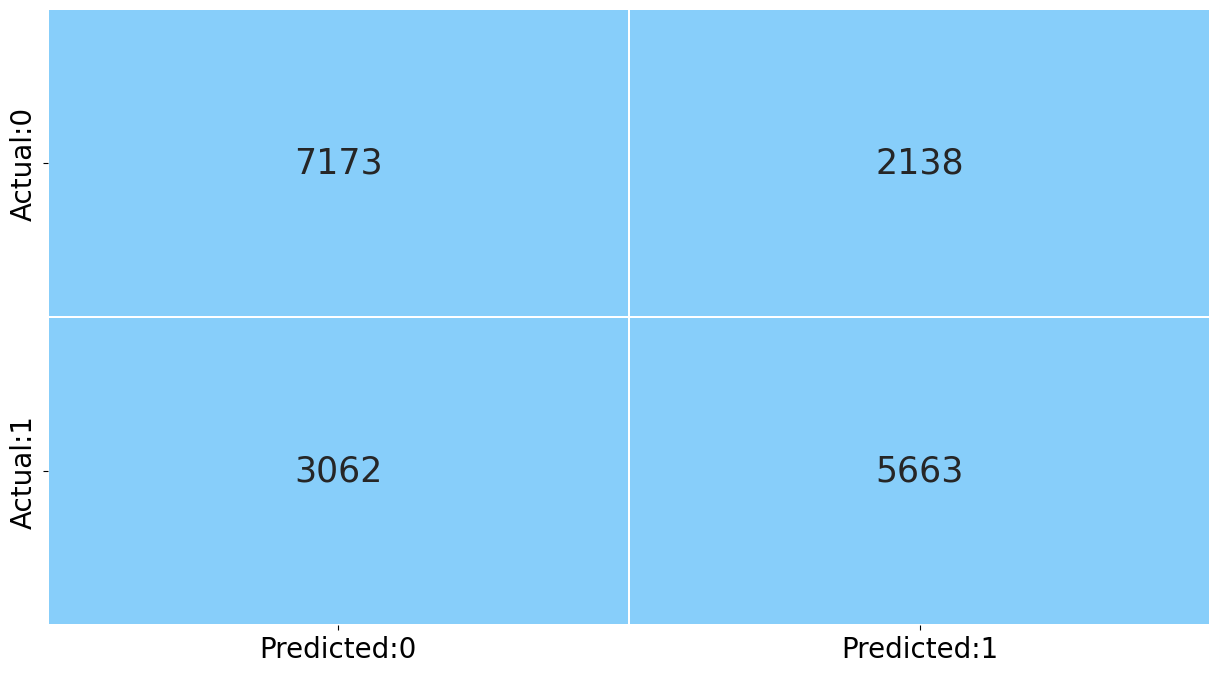

In [267]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [268]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9311
           1       0.73      0.65      0.69      8725

    accuracy                           0.71     18036
   macro avg       0.71      0.71      0.71     18036
weighted avg       0.71      0.71      0.71     18036



In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_test=knn.predict(X_test)
y_pred_train=knn.predict(X_train)

In [270]:
acc_table = classification_report(y_train, y_pred_train)
print(acc_table)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     21451
           1       0.78      0.76      0.77     20631

    accuracy                           0.78     42082
   macro avg       0.78      0.78      0.78     42082
weighted avg       0.78      0.78      0.78     42082



In [271]:
acc_table = classification_report(y_test, y_pred_test)
print(acc_table)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      9311
           1       0.67      0.66      0.66      8725

    accuracy                           0.68     18036
   macro avg       0.68      0.68      0.68     18036
weighted avg       0.68      0.68      0.68     18036



In [272]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred_test=ada.predict(X_test)
y_pred_train=ada.predict(X_train)

In [273]:
acc_table = classification_report(y_train, y_pred_train)
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.80      0.74     21451
           1       0.75      0.64      0.69     20631

    accuracy                           0.72     42082
   macro avg       0.72      0.72      0.72     42082
weighted avg       0.72      0.72      0.72     42082



In [274]:
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9311
           1       0.73      0.65      0.69      8725

    accuracy                           0.71     18036
   macro avg       0.71      0.71      0.71     18036
weighted avg       0.71      0.71      0.71     18036



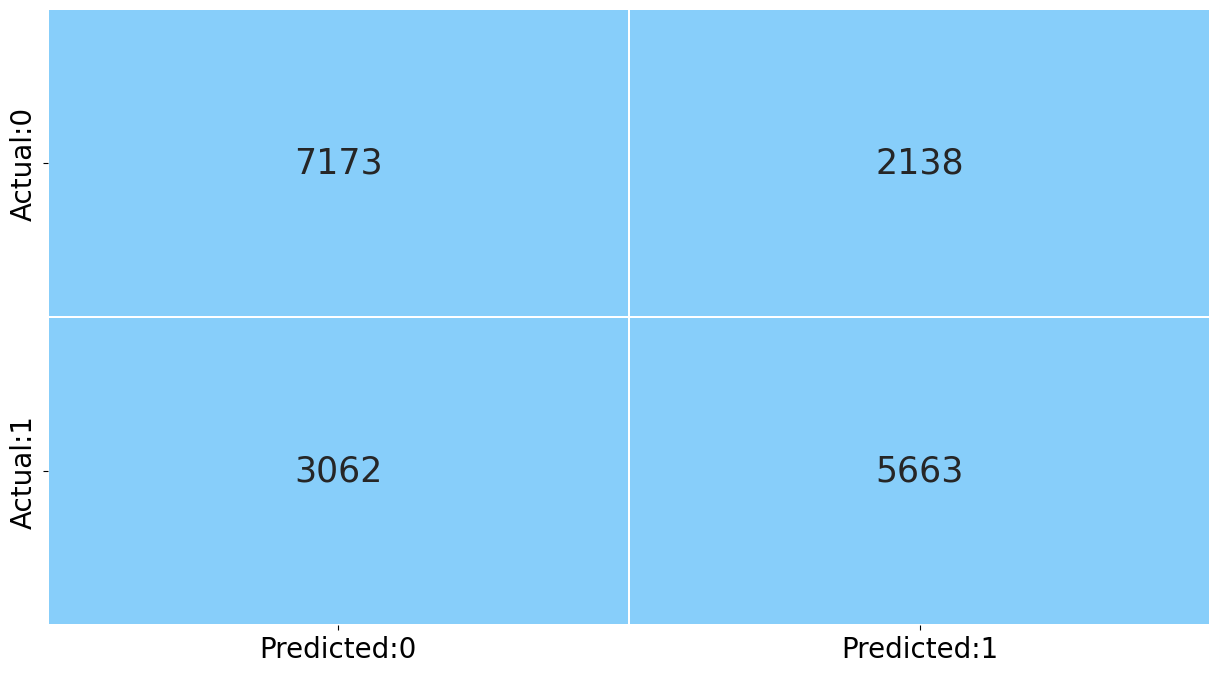

In [275]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [276]:
!pip install xgboost

In [277]:
from xgboost import XGBClassifier
model = XGBClassifier(gamma = 3, learning_rate= 0.1, max_depth= 4)
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [278]:
acc_table = classification_report(y_train, y_pred_train)
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     21451
           1       0.74      0.68      0.71     20631

    accuracy                           0.73     42082
   macro avg       0.73      0.73      0.73     42082
weighted avg       0.73      0.73      0.73     42082



In [279]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9311
           1       0.73      0.65      0.69      8725

    accuracy                           0.71     18036
   macro avg       0.71      0.71      0.71     18036
weighted avg       0.71      0.71      0.71     18036



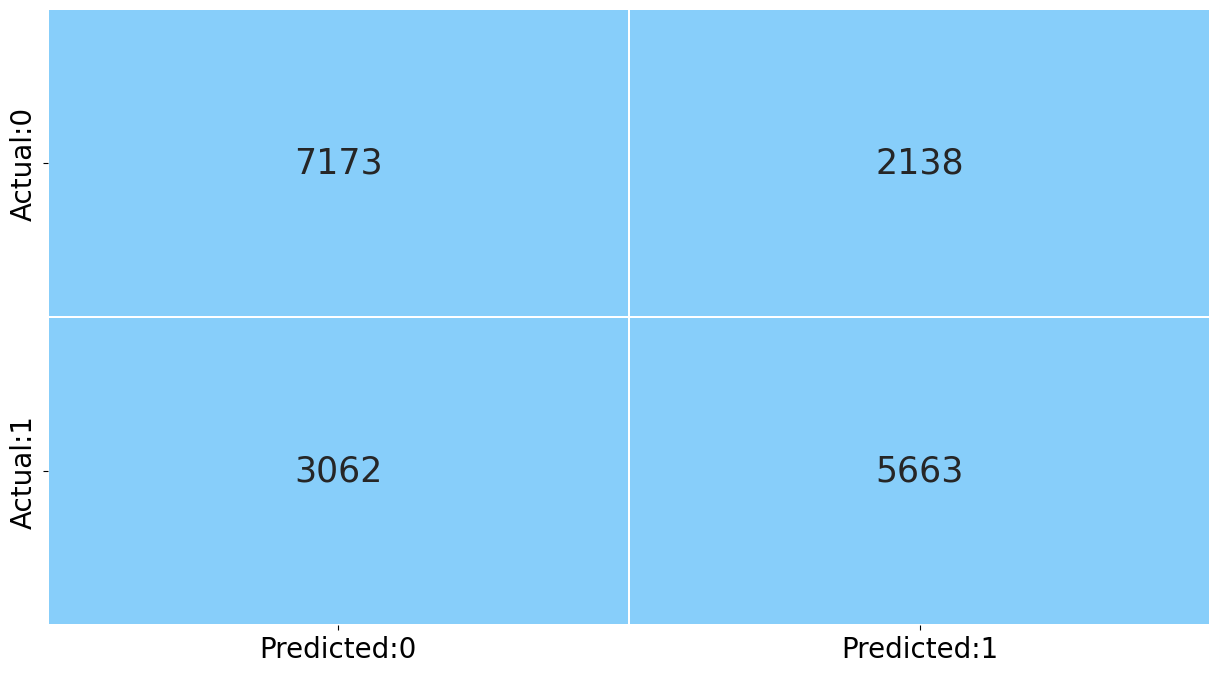

In [280]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [281]:
from sklearn.metrics import auc

In [282]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

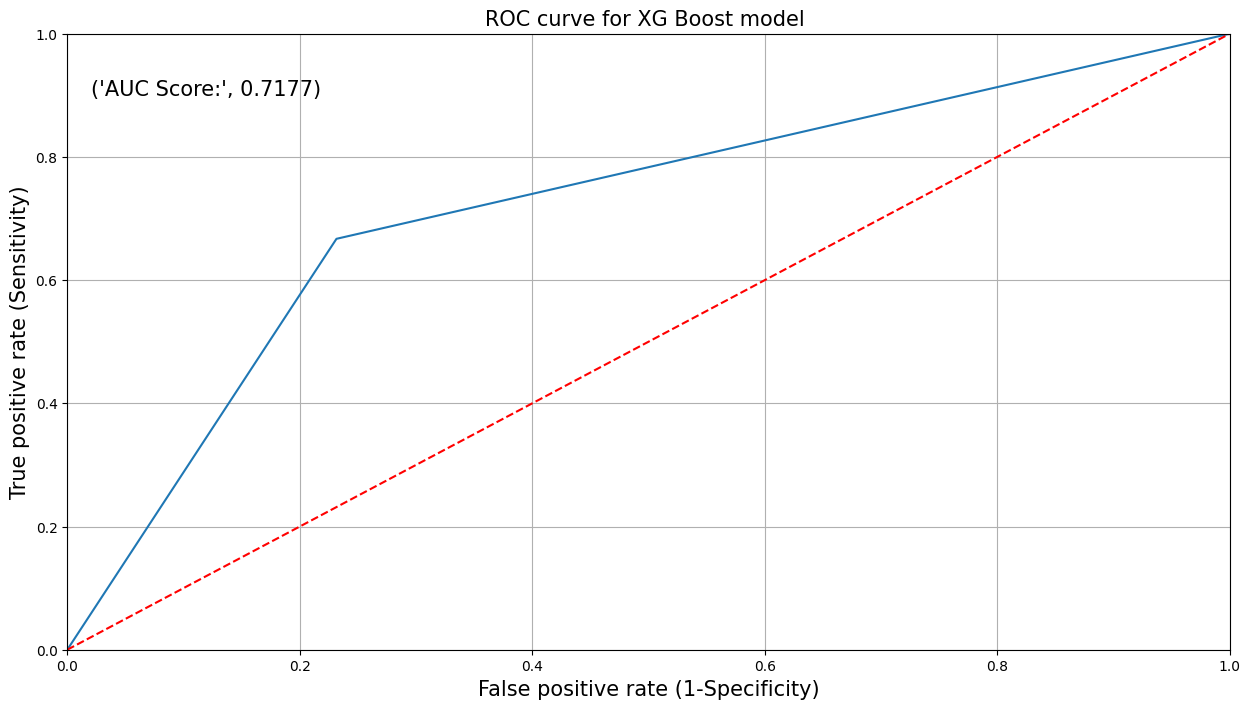

In [283]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for XG Boost model ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_test),4)),fontsize=15)

# plot the grid
plt.grid(True)

In [284]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [285]:
acc_table = classification_report(y_train, y_pred_train)
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     21451
           1       0.75      0.65      0.70     20631

    accuracy                           0.72     42082
   macro avg       0.73      0.72      0.72     42082
weighted avg       0.73      0.72      0.72     42082



In [286]:
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9311
           1       0.73      0.65      0.69      8725

    accuracy                           0.71     18036
   macro avg       0.71      0.71      0.71     18036
weighted avg       0.71      0.71      0.71     18036



In [287]:
#Visualising the independent variables with the target

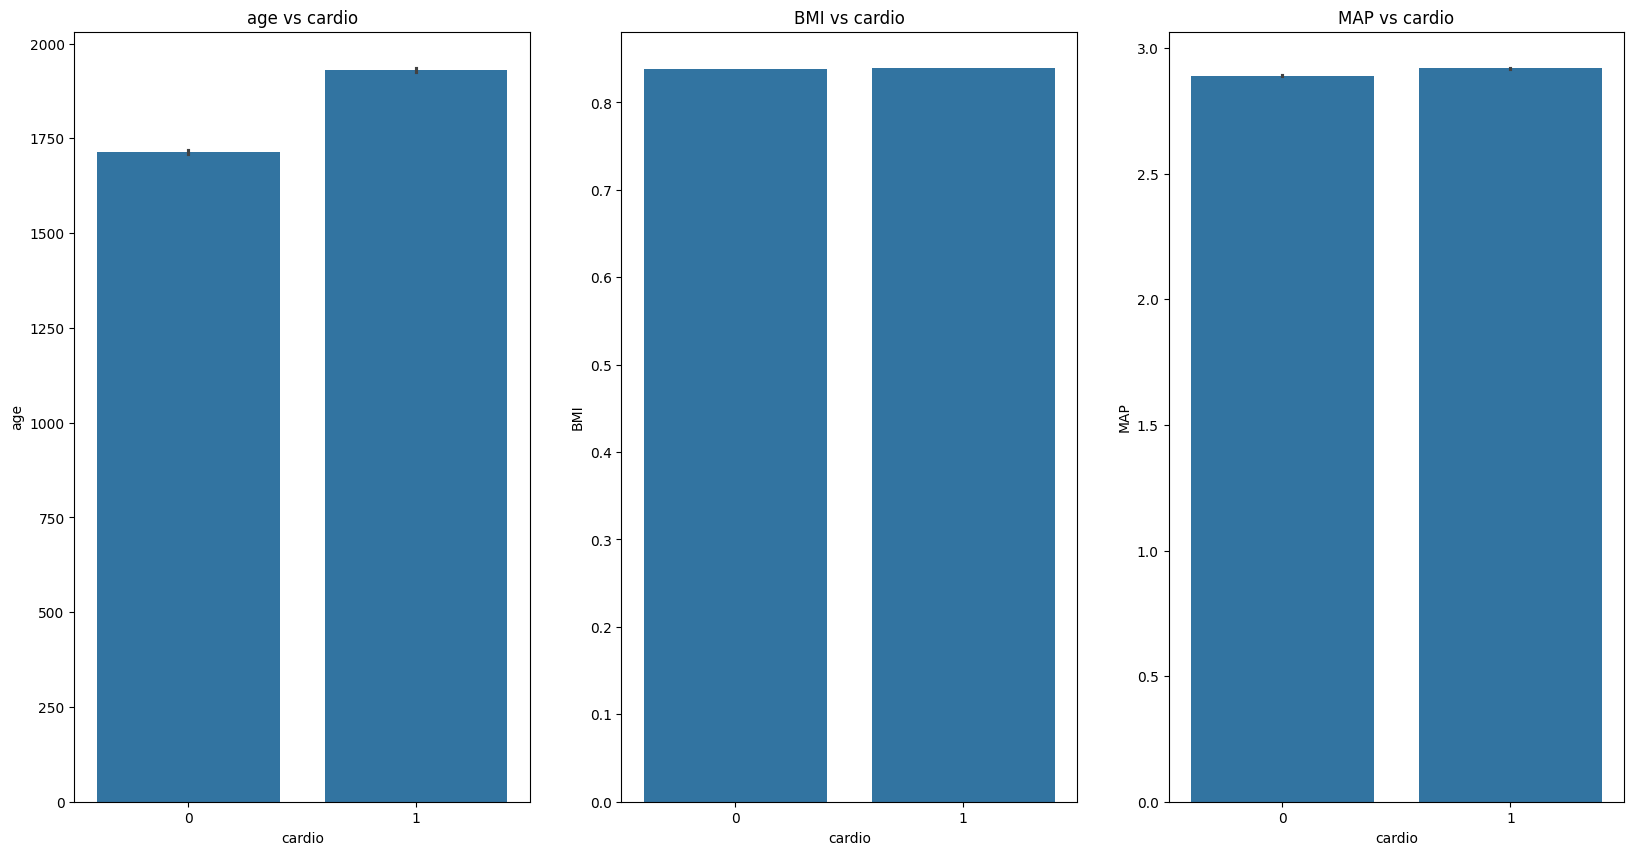

In [288]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
for var,subplot in zip(sigdata.select_dtypes(include=np.number).columns,ax.flatten()):
    subplot.title.set_text(str(var)+" vs"+" cardio")
    sns.barplot(x=sigdata['cardio'],y=var,data=sigdata,ax=subplot)


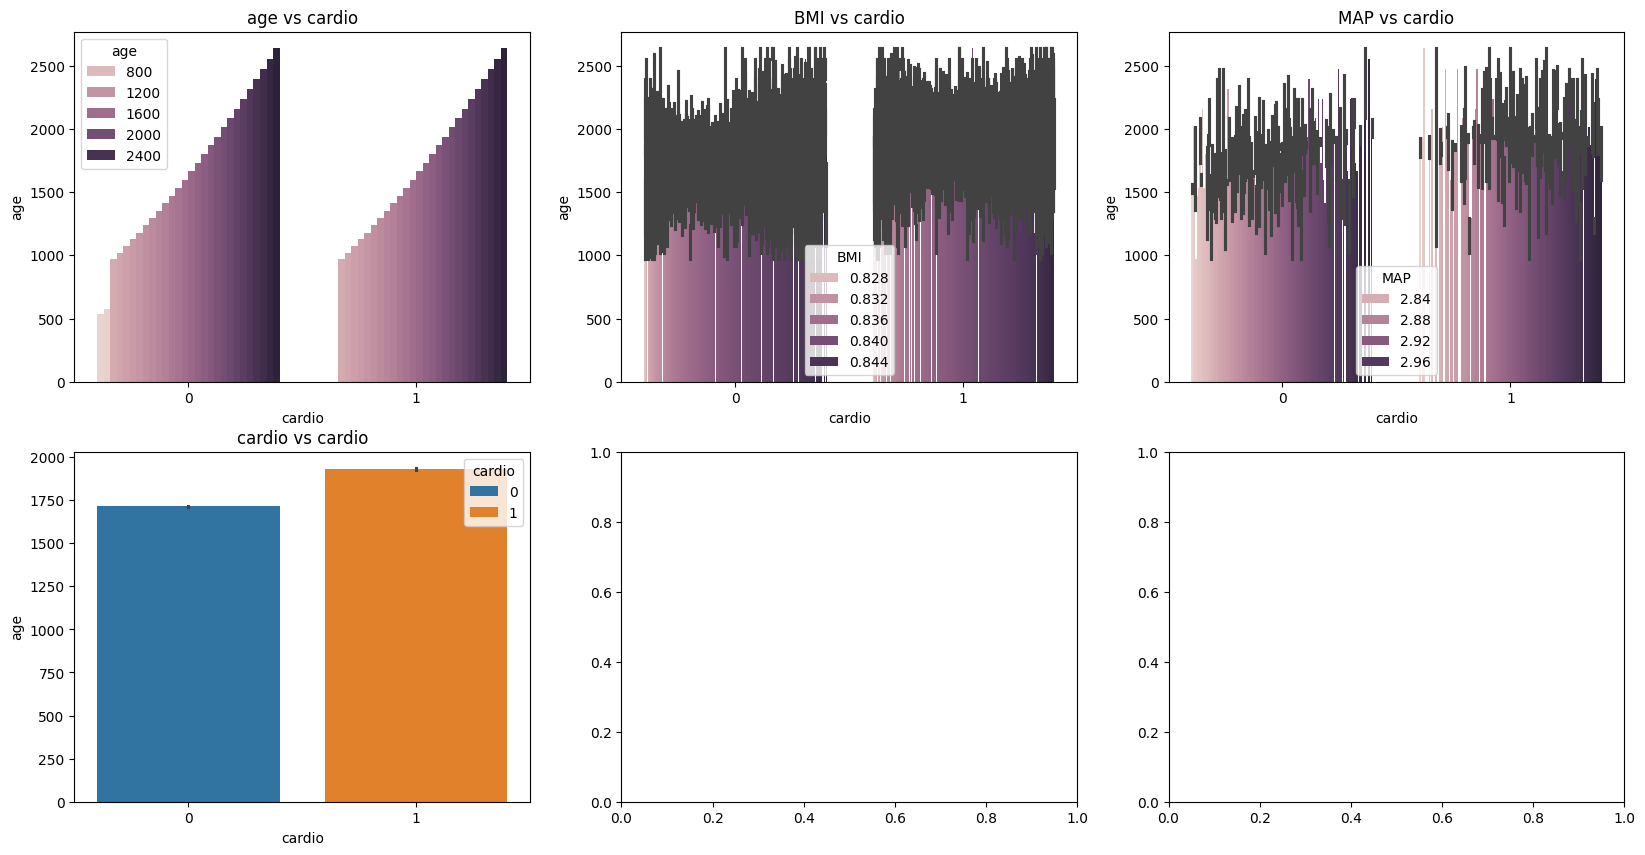

In [290]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for var,subplot in zip(sigdata.select_dtypes(include=np.number).columns,ax.flatten()):
    subplot.title.set_text(str(var)+" vs"+" cardio")
    sns.barplot(x=sigdata['cardio'],y=sigdata["age"],hue=var,data=sigdata,ax=subplot)

In [291]:
import pickle

In [293]:
pickle_out = open('xg_model_1','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

In [295]:
pickle_out2 = open("dt_model",'wb')
pickle.dump(DT_model,pickle_out2)
pickle_out2.close()

In [296]:
pickle_out3 = open("rf_model",'wb')
pickle.dump(RF_model,pickle_out3)
pickle_out3.close()

In [297]:
pickle_out4 = open("knn_model",'wb')
pickle.dump(knn,pickle_out4)
pickle_out4.close()

In [298]:
pickle_out5 = open("ada_model",'wb')
pickle.dump(ada,pickle_out5)
pickle_out5.close()

In [299]:
pickle_out6 = open("svm_model",'wb')
pickle.dump(clf,pickle_out6)
pickle_out6.close()